# Logistics models


In [1]:
def logistic(t, r, K, P0):
    A = (K - P0) / P0
    return K / (1 + A * np.exp(-r * t))


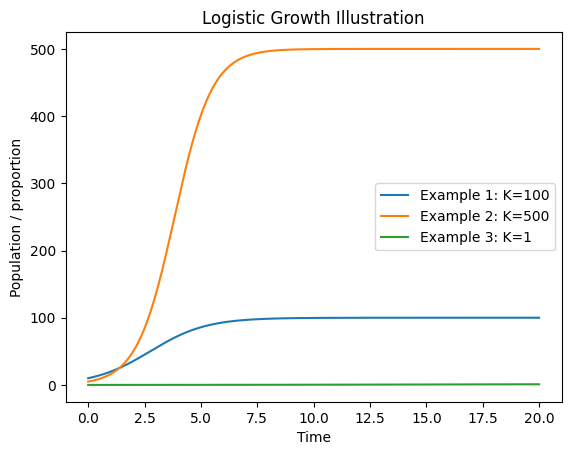

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 400)

def logistic(t, r, K, P0):
    A = (K - P0) / P0
    return K / (1 + A * np.exp(-r * t))

P1 = logistic(t, r=0.8, K=100, P0=10)
P2 = logistic(t, r=1.2, K=500, P0=5)
P3 = logistic(t, r=0.4, K=1, P0=0.01)

plt.figure()
plt.plot(t, P1, label="Example 1: K=100")
plt.plot(t, P2, label="Example 2: K=500")
plt.plot(t, P3, label="Example 3: K=1")
plt.xlabel("Time")
plt.ylabel("Population / proportion")
plt.title("Logistic Growth Illustration")
plt.legend()
plt.show()


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

# For a nicer plot style
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Helper function for plotting (we'll use this multiple times)
def plot_logistic_growth(t, P, K=None, title="Logistic Growth", P0_marker=True):
    plt.figure(figsize=(10, 6))
    plt.plot(t, P, label='Population P(t)')
    if K is not None:
        plt.axhline(K, color='r', linestyle='--', label=f'Carrying Capacity (K={K})')
        # Inflection point
        inflection_time_idx = np.argmin(np.abs(P - K/2))
        if np.abs(P[inflection_time_idx] - K/2) < 0.05 * K : # Check if K/2 is actually reached
            plt.scatter(t[inflection_time_idx], P[inflection_time_idx], color='purple', zorder=5, label=f'Inflection Point (P ≈ K/2)')
            plt.axvline(t[inflection_time_idx], color='purple', linestyle=':', alpha=0.7)


    if P0_marker and len(P) > 0:
        plt.scatter(t[0], P[0], color='g', zorder=5, label=f'Initial Population (P0={P[0]:.2f})')

    plt.xlabel('Time (t)')
    plt.ylabel('Population P(t)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

## 1. Introduction: Beyond Exponential Growth

Imagine a population of bacteria, rabbits, or even the spread of a rumor. Initially, with abundant resources and space, the growth might appear **exponential**.

The differential equation for exponential growth is:
$$ \frac{dP}{dt} = rP $$
where:

* `P(t)` is the population at time `t`.
* `dP/dt` is the rate of change of the population.
* `r` is the intrinsic growth rate (a constant).

The solution to this is `P(t) = P₀ * e^(rt)`, where `P₀` is the initial population. This model predicts unbounded growth, which is unrealistic in most natural systems.

**The Problem with Exponential Growth:**
Resources (food, space, etc.) are finite. As a population grows, it starts to encounter limitations:

* Increased competition for resources.
* Accumulation of waste products.
* Increased predation or disease.

These factors slow down the growth rate. The **logistic model** introduces the concept of a **carrying capacity (K)**, which is the maximum sustainable population size that the environment can support.

## 2. The Logistic Differential Equation

The logistic model modifies the exponential growth equation by introducing a term that reduces the growth rate as the population `P` approaches the carrying capacity `K`.

The logistic differential equation is:
$$ \frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right) $$

Let's break down the components:

* **`P(t)`**: Population at time `t`.
* **`r`**: The **intrinsic rate of natural increase**. This is the rate at which the population would grow if there were no limiting factors (i.e., if `K` were infinite, or `P` were very small). It has units of `1/time`.
* **`K`**: The **carrying capacity** of the environment. This is the maximum population size that the environment can sustainably support. It has the same units as `P`.
* **`rP`**: This is the exponential growth part.
* **`(1 - P/K)`**: This is the **limiting factor** or **environmental resistance** term.
  * **When `P` is small compared to `K` (`P << K`)**:
    * `P/K` is close to 0.
    * `(1 - P/K)` is close to 1.
    * So, `dP/dt ≈ rP` (growth is approximately exponential).
  * **When `P` approaches `K` (`P → K`)**:
    * `P/K` is close to 1.
    * `(1 - P/K)` is close to 0.
    * So, `dP/dt ≈ 0` (growth slows down and stops).
  * **When `P` exceeds `K` (`P > K`)**:
    * `P/K` is greater than 1.
    * `(1 - P/K)` is negative.
    * So, `dP/dt < 0` (population declines back towards `K`).

The term `r(1 - P/K)` can be thought of as the *effective* growth rate, which decreases as `P` increases.

## 3. Solving the Logistic Differential Equation

There are two main ways to "solve" this: analytically (finding an exact formula for `P(t)`) and numerically (approximating the solution).

### 3.1. Analytical Solution

The logistic differential equation is a separable differential equation.
$$ \frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right) $$
$$ \frac{dP}{P(1 - P/K)} = r dt $$
To integrate the left side, we use partial fraction decomposition:
$$ \frac{1}{P(1 - P/K)} = \frac{K}{P(K - P)} = \frac{1}{P} + \frac{1}{K - P} $$
So, the equation becomes:
$$ \left(\frac{1}{P} + \frac{1}{K - P}\right) dP = r dt $$
Integrating both sides:
$$ \int \left(\frac{1}{P} + \frac{1}{K - P}\right) dP = \int r dt $$
$$ \ln|P| - \ln|K - P| = rt + C_1 $$
$$ \ln\left|\frac{P}{K - P}\right| = rt + C_1 $$
Exponentiating both sides:
$$ \left|\frac{P}{K - P}\right| = e^{rt + C_1} = e^{C_1} e^{rt} $$
Let `A = ±e^(C_1)` be a new constant. Assuming `0 < P < K` initially, we can drop the absolute values:
$$ \frac{P}{K - P} = A e^{rt} $$
Now, we solve for `P`. Let `P₀` be the population at `t = 0`.
$$ \frac{P_0}{K - P_0} = A e^{r \cdot 0} = A $$
So, `A = P₀ / (K - P₀)`.
Substitute `A` back:
$$ \frac{P}{K - P} = \frac{P_0}{K - P_0} e^{rt} $$
$$ P(K - P_0) = (K - P) P_0 e^{rt} $$
$$ PK - PP_0 = K P_0 e^{rt} - P P_0 e^{rt} $$
$$ P(K - P_0 + P_0 e^{rt}) = K P_0 e^{rt} $$
$$ P(t) = \frac{K P_0 e^{rt}}{K - P_0 + P_0 e^{rt}} $$
Divide numerator and denominator by `P₀e^(rt)`:
$$ P(t) = \frac{K}{\frac{K - P_0}{P_0 e^{rt}} + 1} $$
$$ P(t) = \frac{K}{1 + \frac{K - P_0}{P_0} e^{-rt}} $$

This is the **analytical solution** to the logistic differential equation.
Let `A_0 = (K - P_0) / P_0`. Then the solution is often written as:
$$ P(t) = \frac{K}{1 + A_0 e^{-rt}} $$

**Key features of the solution:**

* **Sigmoid (S-shaped) curve:** The population starts growing slowly, then accelerates, then decelerates as it approaches `K`.
* **Asymptotes:**
  * As `t → ∞`, `e^(-rt) → 0`, so `P(t) → K / (1 + 0) = K`.
  * As `t → -∞` (less practical for population models but mathematically valid), `e^(-rt) → ∞`, so `P(t) → 0`.
* **Inflection Point:** The growth rate `dP/dt` is maximal when `P = K/2`. This is where the curve changes from concave up to concave down. We can find this by setting the second derivative `d²P/dt² = 0`.
  * `dP/dt = rP - (r/K)P²`
  * `d²P/dt² = r(dP/dt) - (2r/K)P(dP/dt) = (dP/dt) * (r - 2rP/K)`
  * Setting `d²P/dt² = 0`, and knowing `dP/dt ≠ 0` (unless P=0 or P=K), we need `r - 2rP/K = 0`.
  * `r = 2rP/K`
  * `1 = 2P/K`
  * `P = K/2`

### 3.2. Numerical Solution

While the analytical solution is elegant, for more complex systems of differential equations (or if we just want to quickly simulate), numerical methods are very useful. Python's `scipy.integrate.solve_ivp` function is excellent for this.

`solve_ivp` (solve initial value problem) requires:

1. A function defining the ODE(s): `def model(t, y, arg1, arg2, ...)` where `y` is the state variable (our `P`) and `t` is time. `arg1`, `arg2` are other parameters like `r` and `K`.
2. A time span `t_span = (t_start, t_end)` over which to solve.
3. The initial condition `y0 = [P0]`.
4. Optionally, `t_eval` to specify times at which to store the solution.
5. Optionally, `args = (r, K)` to pass additional parameters to the model function.

Let's define the ODE function for `solve_ivp`:

In [2]:
def logistic_ode(t, P, r, K):
    """
    Defines the logistic differential equation.
    P is a list/array, so we access P[0] for the population value.
    """
    return r * P[0] * (1 - P[0] / K)

# 4. Building and Simulating a Logistic Model: Examples

Let's work through some examples.

### Example 1: Rabbit Population

* Initial population `P₀ = 10` rabbits.
* Intrinsic growth rate `r = 0.5` (meaning 50% growth per unit time if unchecked). Let's say time is in months.
* Carrying capacity `K = 100` rabbits.

**Using the Analytical Solution:**

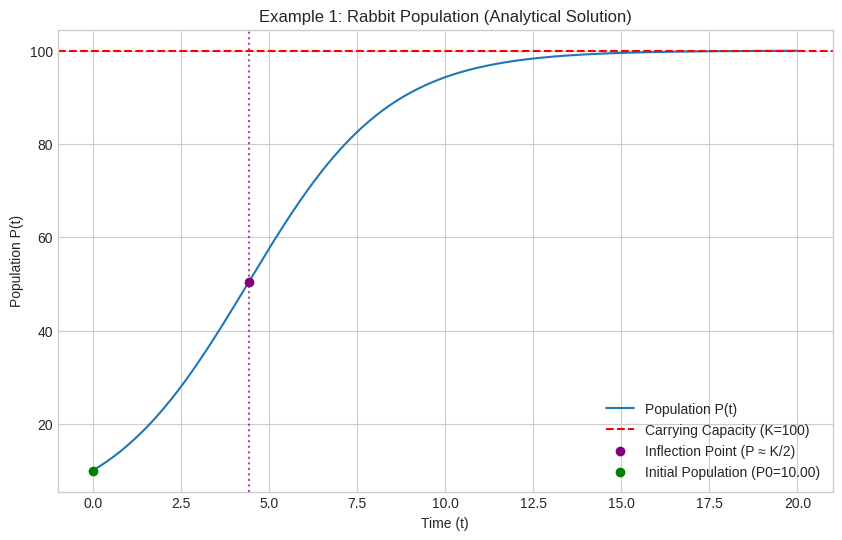

In [3]:
P0_ex1 = 10
r_ex1 = 0.5
K_ex1 = 100

# Time points for evaluation
t_ex1 = np.linspace(0, 20, 200) # 0 to 20 months

# Analytical solution
A0_ex1 = (K_ex1 - P0_ex1) / P0_ex1
P_analytical_ex1 = K_ex1 / (1 + A0_ex1 * np.exp(-r_ex1 * t_ex1))

plot_logistic_growth(t_ex1, P_analytical_ex1, K_ex1, title="Example 1: Rabbit Population (Analytical Solution)", P0_marker=True)

**Using the Numerical Solution (`solve_ivp`):**

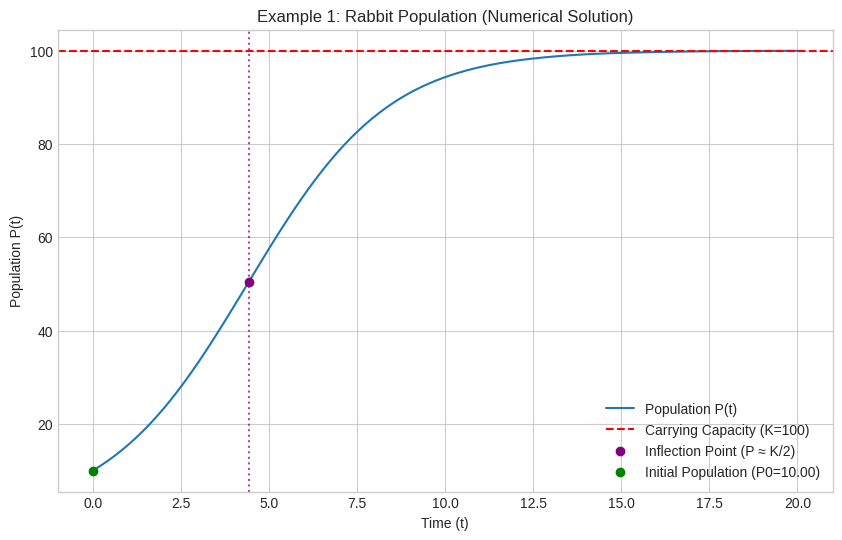

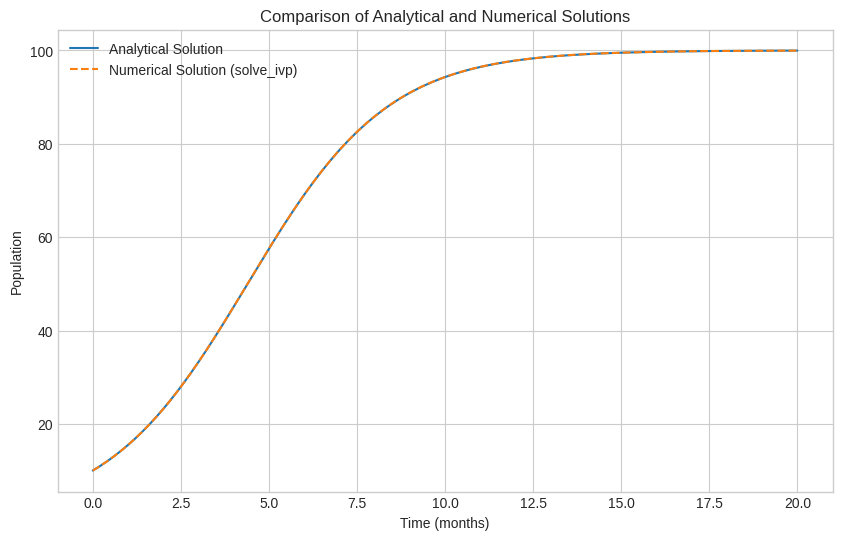

Max absolute difference: 3.13e-02


In [4]:
# Time span for the solver
t_span_ex1 = (t_ex1.min(), t_ex1.max())

# Initial condition must be an array-like
initial_conditions_ex1 = [P0_ex1]

# Solve the ODE
# Note: solve_ivp expects P to be an array, so logistic_ode accesses P[0]
sol_ex1 = solve_ivp(logistic_ode, t_span_ex1, initial_conditions_ex1,
                    args=(r_ex1, K_ex1),
                    dense_output=True,  # Allows evaluation at t_eval points
                    t_eval=t_ex1)

P_numerical_ex1 = sol_ex1.y[0] # The solution for P is the first (and only) element of y

plot_logistic_growth(sol_ex1.t, P_numerical_ex1, K_ex1, title="Example 1: Rabbit Population (Numerical Solution)", P0_marker=True)

# Compare analytical and numerical
plt.figure(figsize=(10,6))
plt.plot(t_ex1, P_analytical_ex1, label='Analytical Solution', linestyle='-')
plt.plot(sol_ex1.t, P_numerical_ex1, label='Numerical Solution (solve_ivp)', linestyle='--')
plt.title('Comparison of Analytical and Numerical Solutions')
plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.legend()
plt.show()

print(f"Max absolute difference: {np.max(np.abs(P_analytical_ex1 - P_numerical_ex1)):.2e}")

As you can see, the numerical and analytical solutions are virtually identical, which gives us confidence in the numerical solver.


### Example 2: Spread of a Flu Virus in a Small Town

* Town population (potential hosts) `K = 1000` people.
* Initially, `P₀ = 5` people are infected.
* The infection rate `r = 0.2` (each infected person infects 0.2 others per day, in the early stages).

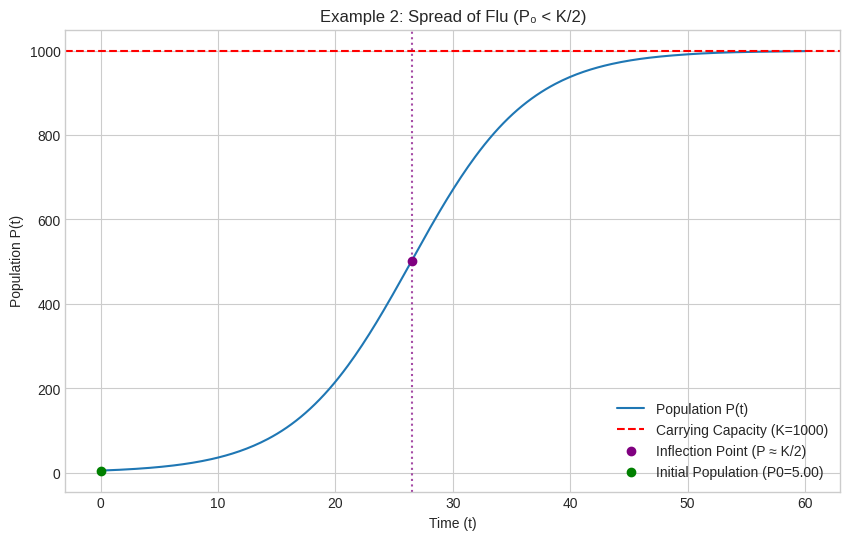

In [5]:
P0_ex2 = 5
r_ex2 = 0.2
K_ex2 = 1000 # Total susceptible population

t_values_ex2 = np.linspace(0, 60, 300) # 0 to 60 days
t_span_ex2 = (t_values_ex2.min(), t_values_ex2.max())
initial_conditions_ex2 = [P0_ex2]

sol_ex2 = solve_ivp(logistic_ode, t_span_ex2, initial_conditions_ex2,
                    args=(r_ex2, K_ex2),
                    dense_output=True,
                    t_eval=t_values_ex2)

P_numerical_ex2 = sol_ex2.y[0]

plot_logistic_growth(sol_ex2.t, P_numerical_ex2, K_ex2, title="Example 2: Spread of Flu (P₀ < K/2)", P0_marker=True)

Notice the characteristic S-shape. The inflection point (fastest spread) occurs when P is K/2 = 500.

What if the initial number of infected people is already past K/2?
Let's say `P₀ = 600`.


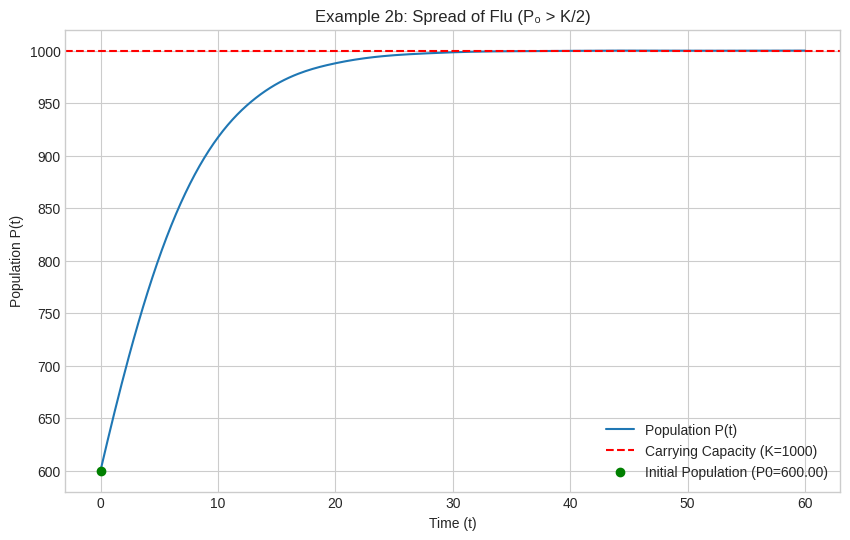

In [6]:
P0_ex2b = 600 # Already past K/2

initial_conditions_ex2b = [P0_ex2b]

sol_ex2b = solve_ivp(logistic_ode, t_span_ex2, initial_conditions_ex2b,
                     args=(r_ex2, K_ex2),
                     dense_output=True,
                     t_eval=t_values_ex2)

P_numerical_ex2b = sol_ex2b.y[0]

plot_logistic_growth(sol_ex2b.t, P_numerical_ex2b, K_ex2, title="Example 2b: Spread of Flu (P₀ > K/2)", P0_marker=True)

The curve is still S-shaped, but we only see the top half (decelerating growth) because we started past the inflection point.

### Example 3: Market Saturation of a New Product

* Potential market size `K = 500,000` units.
* Initial sales `P₀ = 1000` units in the first month.
* Adoption rate `r = 0.8` (driven by marketing, word-of-mouth, etc.). Time in months.


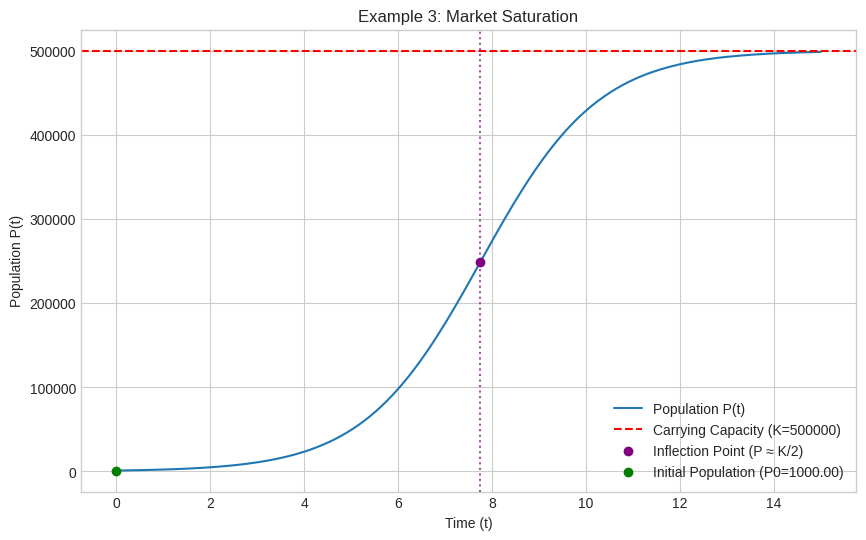

In [7]:
P0_ex3 = 1000
r_ex3 = 0.8
K_ex3 = 500000

t_values_ex3 = np.linspace(0, 15, 150) # 0 to 15 months
t_span_ex3 = (t_values_ex3.min(), t_values_ex3.max())
initial_conditions_ex3 = [P0_ex3]

sol_ex3 = solve_ivp(logistic_ode, t_span_ex3, initial_conditions_ex3,
                    args=(r_ex3, K_ex3),
                    dense_output=True,
                    t_eval=t_values_ex3)

P_numerical_ex3 = sol_ex3.y[0]

plot_logistic_growth(sol_ex3.t, P_numerical_ex3, K_ex3, title="Example 3: Market Saturation", P0_marker=True)

## 5. Parameter Estimation (Fitting the Model to Data)

In real-world scenarios, you often have data (e.g., population counts over time) and you want to find the parameters (`r`, `K`, and sometimes `P₀`) that best describe this data using the logistic model. This is a common task in data analysis and modeling.

We can use `scipy.optimize.curve_fit` for this. `curve_fit` fits a function (in our case, the analytical solution of the logistic model) to data by minimizing the sum of the squared residuals.

**Steps:**

1. Define the model function to be fitted (the analytical solution `P(t)`).
2. Generate some synthetic data (or use real data).
3. Use `curve_fit` to find the optimal parameters.

**1. Define the model function for `curve_fit`:**
This function should take the independent variable (time `t`) as its first argument, followed by the parameters to be fitted.

In [10]:
def logistic_analytical_solution(t, P0_fit, r_fit, K_fit):
    """
    Analytical solution of the logistic equation.
    Parameters P0, r, K are to be fitted by curve_fit.
    """
    # Prevent division by zero or log of zero if P0 is K or 0
    if P0_fit == K_fit or P0_fit == 0:
        # If P0 is K, P(t) = K. If P0 is 0, P(t) = 0.
        # This simplified handling might not be robust for all edge cases in fitting.
        return np.full_like(t, P0_fit)

    A0 = (K_fit - P0_fit) / P0_fit
    # Handle potential overflow with large negative A0 * exp(-r_fit * t)
    # This can happen if P0_fit is very small.
    # We can rewrite P(t) = K * P0 / (P0 + (K - P0) * exp(-r_fit * t))
    # This form is often more numerically stable when P0 is small.
    numerator = K_fit * P0_fit
    denominator = P0_fit + (K_fit - P0_fit) * np.exp(-r_fit * t)
    
    # Avoid division by zero if denominator becomes zero (should not happen with positive r and K > P0)
    # If K_fit < P0_fit, then K_fit - P0_fit is negative. If r_fit is also negative, exp term can grow.
    # For typical logistic growth, r_fit > 0.
    # If P0_fit is very close to K_fit, A0 is close to 0.
    if np.any(np.abs(denominator) < 1e-9): # Check for very small denominator
        # Fallback or specific handling for P0 close to K
        if np.abs(P0_fit - K_fit) < 1e-6 * K_fit : # If P0 is very close to K
            return np.full_like(t, K_fit)
        else: # A more general issue, return NaN or raise error
            return np.full_like(t, np.nan)


    return numerator / denominator
    # Old form: return K_fit / (1 + A0 * np.exp(-r_fit * t))

**2. Generate Synthetic Data (with some noise):**
Let's use parameters similar to Example 1 and add some random noise.

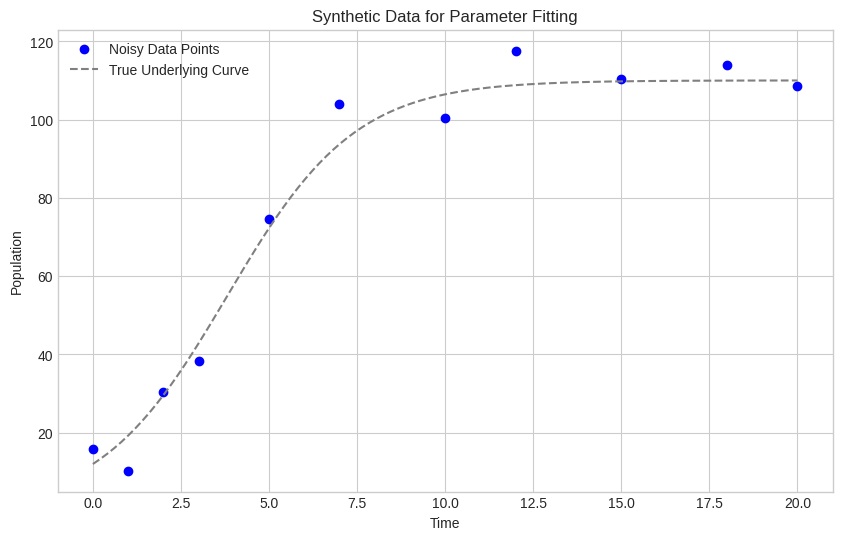

In [11]:
# True parameters for generating data
P0_true = 12
r_true = 0.55
K_true = 110

t_data = np.array([0, 1, 2, 3, 5, 7, 10, 12, 15, 18, 20]) # Unevenly spaced time points
P_exact = logistic_analytical_solution(t_data, P0_true, r_true, K_true)

# Add some noise
noise_level = 5.0
P_noisy_data = P_exact + noise_level * np.random.normal(size=t_data.shape)
P_noisy_data = np.maximum(P_noisy_data, 0) # Ensure population is not negative

plt.figure(figsize=(10,6))
plt.scatter(t_data, P_noisy_data, label='Noisy Data Points', color='b')
plt.plot(t_ex1, logistic_analytical_solution(t_ex1, P0_true, r_true, K_true), color='gray', linestyle='--', label='True Underlying Curve')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Synthetic Data for Parameter Fitting')
plt.show()

**3. Use `curve_fit`:**
We need to provide `curve_fit` with:

* The model function (`logistic_analytical_solution`).
* The independent data (`t_data`).
* The dependent data (`P_noisy_data`).
* Initial guesses for the parameters (`p0`). This is important for non-linear fitting.
* Optionally, bounds for the parameters (`bounds`).

True Parameters:
P0 = 12.00, r = 0.55, K = 110.00

Fitted Parameters:
P0_fit = 10.35, r_fit = 0.57, K_fit = 117.62

Standard Errors of Fitted Parameters:
SE_P0 = 3.09, SE_r = 0.08, SE_K = 3.58


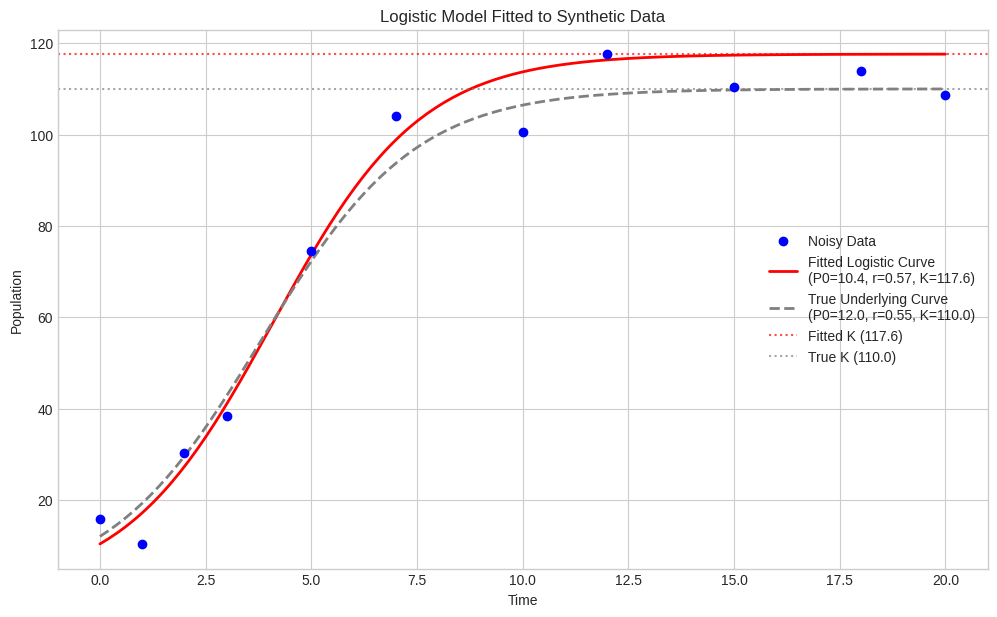

In [12]:
# Initial guesses for parameters [P0, r, K]
initial_guesses = [P_noisy_data[0], 0.3, np.max(P_noisy_data) * 1.1] # P0, r, K

# Bounds for parameters: (P0_min, r_min, K_min), (P0_max, r_max, K_max)
# P0 should be positive, r positive, K greater than max observed P
lower_bounds = [0.1, 0.01, np.max(P_noisy_data)]
upper_bounds = [np.max(P_noisy_data)*2 , 2.0, np.max(P_noisy_data) * 5] # K can be much larger

try:
    params_fitted, covariance_matrix = curve_fit(
        logistic_analytical_solution,
        t_data,
        P_noisy_data,
        p0=initial_guesses,
        bounds=(lower_bounds, upper_bounds),
        maxfev=5000 # Increase max function evaluations if convergence is an issue
    )

    P0_fit, r_fit, K_fit = params_fitted

    print("True Parameters:")
    print(f"P0 = {P0_true:.2f}, r = {r_true:.2f}, K = {K_true:.2f}")
    print("\nFitted Parameters:")
    print(f"P0_fit = {P0_fit:.2f}, r_fit = {r_fit:.2f}, K_fit = {K_fit:.2f}")

    # Standard errors of the parameters
    std_errors = np.sqrt(np.diag(covariance_matrix))
    print("\nStandard Errors of Fitted Parameters:")
    print(f"SE_P0 = {std_errors[0]:.2f}, SE_r = {std_errors[1]:.2f}, SE_K = {std_errors[2]:.2f}")


    # Plot the results
    t_plot = np.linspace(t_data.min(), t_data.max(), 200)
    P_fitted_curve = logistic_analytical_solution(t_plot, P0_fit, r_fit, K_fit)
    P_true_curve = logistic_analytical_solution(t_plot, P0_true, r_true, K_true)


    plt.figure(figsize=(12, 7))
    plt.scatter(t_data, P_noisy_data, label='Noisy Data', color='blue', zorder=10)
    plt.plot(t_plot, P_fitted_curve, label=f'Fitted Logistic Curve\n(P0={P0_fit:.1f}, r={r_fit:.2f}, K={K_fit:.1f})', color='red', linewidth=2)
    plt.plot(t_plot, P_true_curve, label=f'True Underlying Curve\n(P0={P0_true:.1f}, r={r_true:.2f}, K={K_true:.1f})', color='gray', linestyle='--', linewidth=2)

    plt.axhline(K_fit, color='red', linestyle=':', alpha=0.7, label=f'Fitted K ({K_fit:.1f})')
    plt.axhline(K_true, color='gray', linestyle=':', alpha=0.7, label=f'True K ({K_true:.1f})')


    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Model Fitted to Synthetic Data')
    plt.legend(loc='center right')
    plt.grid(True)
    plt.show()

except RuntimeError:
    print("curve_fit could not find optimal parameters. Try different initial_guesses or bounds.")
except ValueError as e:
    print(f"ValueError during curve_fit: {e}. Check bounds or initial guesses.")


**Important Notes on Parameter Fitting:**

* **Good Initial Guesses:** Non-linear fitting algorithms like the Levenberg-Marquardt method used by `curve_fit` can be sensitive to initial guesses. Poor guesses might lead to convergence to a local minimum or failure to converge.
  * `P₀`: Can be estimated from the first data point.
  * `K`: Can be estimated as slightly above the maximum observed population.
  * `r`: Harder to guess. Can try a range, or estimate from the initial slope if `P₀` is small.
* **Bounds:** Providing bounds can help guide the optimization process and prevent unrealistic parameter values.
* **Data Quality and Quantity:** The more data points you have, and the less noisy they are, the better your parameter estimates will be. Fitting a logistic curve with too few points (e.g., only 3-4) can be unreliable. You need enough points to capture the S-shape, especially the inflection and approach to K.
* **Identifiability:** If your data doesn't show the full S-curve (e.g., only the initial exponential-like phase, or only the plateau phase), it can be hard to reliably estimate all parameters. For instance, if the data doesn't approach `K`, `K` will be poorly determined. If data is only on the plateau, `r` and `P0` will be hard to find.

## 6. Limitations and Extensions

The basic logistic model is a simplification. Real-world populations can be affected by:

* **Time-varying `r` or `K`:** Environmental conditions, resource availability, or predation can change over time.
* **Allee effect:** At very small population sizes, the growth rate might be reduced (e.g., difficulty finding mates). The standard logistic model doesn't capture this.
* **Time delays:** The effect of population density on birth/death rates might not be instantaneous.
* **Stochasticity:** Random events can significantly impact small populations.
* **Spatial structure:** Populations are often not well-mixed.
* **Multiple species interactions:** Predation, competition with other species.

These can lead to more complex models, often systems of differential equations or models incorporating stochastic elements.

## 7. Conclusion

Logistic models provide a fundamental and widely applicable framework for understanding growth processes that are limited by carrying capacities.

* They are defined by a simple non-linear **differential equation**: `dP/dt = rP(1 - P/K)`.
* They have an **analytical solution** that describes an S-shaped (sigmoid) curve.
* They can be **solved numerically** using tools like `scipy.integrate.solve_ivp`.
* Their parameters (`P₀`, `r`, `K`) can be **estimated from data** using `scipy.optimize.curve_fit`.

Understanding logistic growth is a key step towards modeling more complex dynamic systems in biology, ecology, epidemiology, economics, and many other fields.